<a href="https://colab.research.google.com/github/humayel1/Sales-Prediction-for-major-chain-store-Rossman/blob/main/ML_Regression_Sales_Prediction_for_Rossman_project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Regression - Retail Sales Prediction: Predicting sales of a major store chain Rossmann



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member - Humayel**



# **Project Summary -**

In seven European nations, Rossmann runs more than 3,000 pharmacies. Store managers at Rossmann are currently required to forecast their daily sales up to six weeks ahead of time. Numerous factors, such as competition, school and state holidays, seasonality, locality, and promotions, affect store sales. The accuracy of the statistics can vary greatly since thousands of managers forecast sales based on their own set of conditions.
Historical sales information for 1,115 Rossmann establishments is given to you. Predicting the "Sales" column for the test set is the task. It should be noted that a few of the dataset's stores were briefly closed for renovations.

## Data Description

#### Rossmann Stores Data.csv - historical data including Sales
#### store.csv  - supplemental information about the stores


#### <u>Data fields</u>
#### Most of the fields are self-explanatory.

* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **GitHub Link -**

https://github.com/humayel1/Sales-Prediction-for-magor-chain-store-Rossman

# **Problem Statement**


Product interest continues to fluctuate from time to time. No company can focus on financial expansion without accurately determining the interest of its customers and the future demand for its products. The process of projecting demand or sales of a specific product over a given time period is known as sales forecasting. In this project, a machine learning model for sales forecasting will be developed and a real-world business problem will be solved.

Here, our objective is to project each store's sales for the next six weeks, identify the variables that affect it, and offer suggestions for raising the figures.

####Approach
* Business Problem
* Data Collection and Preprocessing
      - Importing important libraries and modules
      - Data Cleaning
      - Missing Data Handling
      - Merging the Datasets
* Exploratory Data Analysis
      - Hypotheses
      - Categorical Features
      - Continuous Features
      - EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
      - Feature Engineering
      - Outlier Detection and Treatment
* Modeling
      - Train Test Split
      - Baseline Model - Decision Tree
      - Random Forest Model
      - Random Forest Hyperparameter Tuning
      - Random Forest Feature Importance
* Model Performance and Evaluation
        - Visualizing Model Performances
        - Random Forest vs Baseline Model
        - Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
#reading the csv file and converting it to pandas dataframes
sales_df = pd.read_csv("/content/drive/MyDrive/Capstone Projects AlmaBetter/Almabetter Capstone Projects/ML Rossman project/Rossman ML datasets/Rossmann Stores Data.csv",parse_dates=['Date'])
stores_df = pd.read_csv("/content/drive/MyDrive/Capstone Projects AlmaBetter/Almabetter Capstone Projects/ML Rossman project/Rossman ML datasets/store.csv")

### Dataset First View

In [4]:
#we have historical sales data and stores datasets
#first look of the sales data
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,1438300800000000000,5263,555,1,1,0.0,1
1,2,5,1438300800000000000,6064,625,1,1,0.0,1
2,3,5,1438300800000000000,8314,821,1,1,0.0,1
3,4,5,1438300800000000000,13995,1498,1,1,0.0,1
4,5,5,1438300800000000000,4822,559,1,1,0.0,1


In [5]:
#first look of stores dataframe
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
#info about the sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Store          1017209 non-null  int64  
 1   DayOfWeek      1017209 non-null  int64  
 2   Date           1017209 non-null  object 
 3   Sales          1017209 non-null  int64  
 4   Customers      1017209 non-null  int64  
 5   Open           1017209 non-null  int64  
 6   Promo          1017209 non-null  int64  
 7   StateHoliday   1017209 non-null  float64
 8   SchoolHoliday  1017209 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 69.8+ MB


There are  1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.

In [7]:
#info about the stores
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicates1 = sales_df[sales_df.duplicated()]
print(duplicates1.sum())

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


In [9]:
duplicates2 = stores_df[stores_df.duplicated()]
print(duplicates2.sum())

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64


#### Missing Values/Null Values

In [10]:
#null values in stores df
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:
* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.      


Text(0.5, 0, 'Competition Distance Distribution Plot')

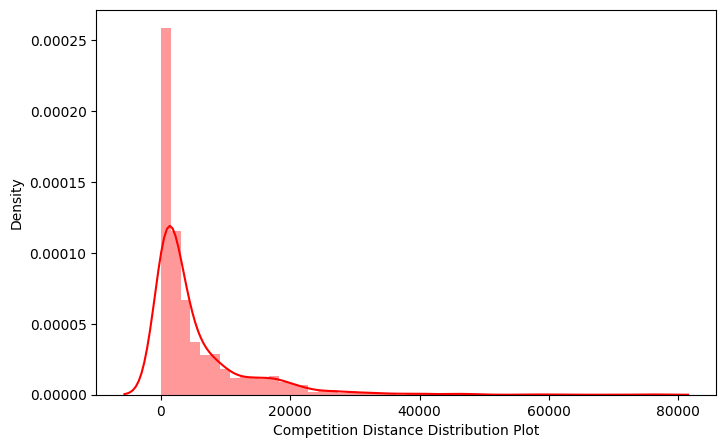

In [11]:
# Visualizing the missing values
#distribution plot of competition distance
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x=stores_df['CompetitionDistance'], hist=True, color='red')
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [12]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [13]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [14]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [15]:
#check
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

####Merging the two Datasets

In [16]:
#merge the datasets on stores data
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [17]:
#first five rows of the merged dataset
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,1438300800000000000,5263,555,1,1,0.0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,1438300800000000000,6064,625,1,1,0.0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,1438300800000000000,8314,821,1,1,0.0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,1438300800000000000,13995,1498,1,1,0.0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,1438300800000000000,4822,559,1,1,0.0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [18]:
#shape of the dataframe
df.shape

(1017209, 18)

### What did you know about your dataset?

There are 1017209 rows or observations and 9 columns in this dataset Sales_df. There seems to be no null values in it. It has integer, datetime and object as data types.

**Size of the Dataset stores_df**: The dataset contains 1115 entries (rows) and 10 columns.

**Data Types**: The dataset includes columns with integer, datetime, and object data types.

**Missing Values**: There are missing values in several columns:

* **CompetitionDistance**: Missing values need to be imputed based on the distribution of distances. The distribution is skewed to the right, with most values concentrated towards the left, so using the median for imputation is suggested.
* **CompetitionOpenSinceMonth and CompetitionOpenSinceYear**: Missing values can be imputed with the mode (most frequent) values of each respective column.
* **Promo2SinceWeek, Promo2SinceYear, and PromoInterval: These columns have NaN values wherever Promo2 is 0 or False. They can be replaced with 0.**

**Imputation Strategy:**

* For **CompetitionDistance**, using the median is preferred due to the skewness of the distribution.
* For **CompetitionOpenSinceMonth and CompetitionOpenSinceYear**, imputing with the mode is suggested.
* For **Promo2SinceWeek, Promo2SinceYear, and PromoInterval, NaN values can be replaced with 0 where Promo2** is 0 or False.

**Data Exploration Opportunity**: Exploring the distribution of CompetitionDistance can provide insights into the distance at which stores are typically opened, helping to inform the imputation strategy for missing values.

Overall, these details give us a good understanding of the dataset and the necessary steps to handle missing values effectively before proceeding with further analysis or modeling.

## ***2. Understanding Your Variables***

In [19]:
#datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  float64
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [20]:
#creating a categorical column list
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [21]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: [0.]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [22]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

####Extracting from the Date


In [23]:
# Identify columns with non-numeric values
non_numeric_cols = sales_df.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values:", non_numeric_cols)

# Check for unique values in non-numeric columns
for col in non_numeric_cols:
    unique_values = sales_df[col].unique()
    print(f"Unique values in column '{col}':", unique_values)

# For example, if the non-numeric values represent missing values, you can replace them with NaN:
sales_df[non_numeric_cols] = sales_df[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Then, you can drop rows with NaN values or impute missing values as needed.

# After handling non-numeric values, proceed with data preprocessing, model training, and evaluation as usual.

Columns with non-numeric values: Index(['Date'], dtype='object')
Unique values in column 'Date': ['1438300800000000000' '1438214400000000000' '1438128000000000000'
 '1438041600000000000' '1437955200000000000' '1437868800000000000'
 '1437782400000000000' '1437696000000000000' '1437609600000000000'
 '1437523200000000000' '1437436800000000000' '1437350400000000000'
 '1437264000000000000' '1437177600000000000' '1437091200000000000'
 '1437004800000000000' '1436918400000000000' '1436832000000000000'
 '1436745600000000000' '1436659200000000000' '1436572800000000000'
 '1436486400000000000' '1436400000000000000' '1436313600000000000'
 '1436227200000000000' '1436140800000000000' '1436054400000000000'
 '1435968000000000000' '1435881600000000000' '1435795200000000000'
 '1435708800000000000' '1435622400000000000' '1435536000000000000'
 '1435449600000000000' '1435363200000000000' '1435276800000000000'
 '1435190400000000000' '1435104000000000000' '1435017600000000000'
 '1434931200000000000' '14348448

In [24]:
# Convert non-numeric values to numeric
holiday_mapping = {'0': 0, 'a': 1, 'b': 2, 'c': 3}
sales_df['StateHoliday'] = sales_df['StateHoliday'].map(holiday_mapping).fillna(0)

# Check if conversion is successful
print("Unique values in 'StateHoliday' after conversion:", sales_df['StateHoliday'].unique())


Unique values in 'StateHoliday' after conversion: [0.]


In [25]:
sales_df.to_csv('/content/drive/MyDrive/Rossman ML Training, Test dataset/Rossmann Stores Data.csv', index=False)

In [26]:
# Convert 'Date' column to datetime format with microseconds precision
df['Date'] = pd.to_datetime(df['Date'], unit='us', errors='coerce')


In [27]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

# Check unique years
years = df['Year'].unique()

In [28]:
# Save DataFrame to cleaned.csv
df.to_csv("/content/drive/MyDrive/Capstone Projects AlmaBetter/Almabetter Capstone Projects/ML Rossman project/Rossman ML datasets/cleaned.csv", index=False)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [29]:
# Write your code to make your dataset analysis ready.
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [30]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [31]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

In [32]:
#merge the datasets on stores data
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [33]:
#creating a categorical column list
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [34]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: [0.]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [35]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

In [36]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

# Check unique years
years = df['Year'].unique()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Categorical Features:

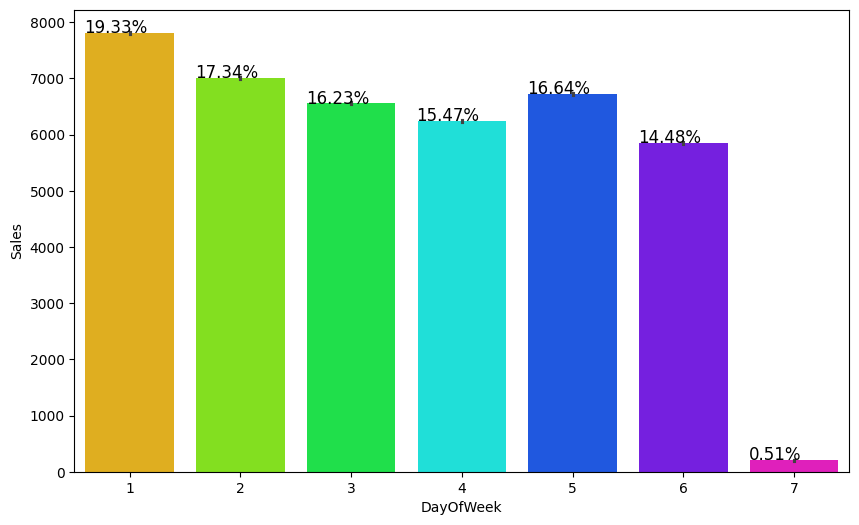

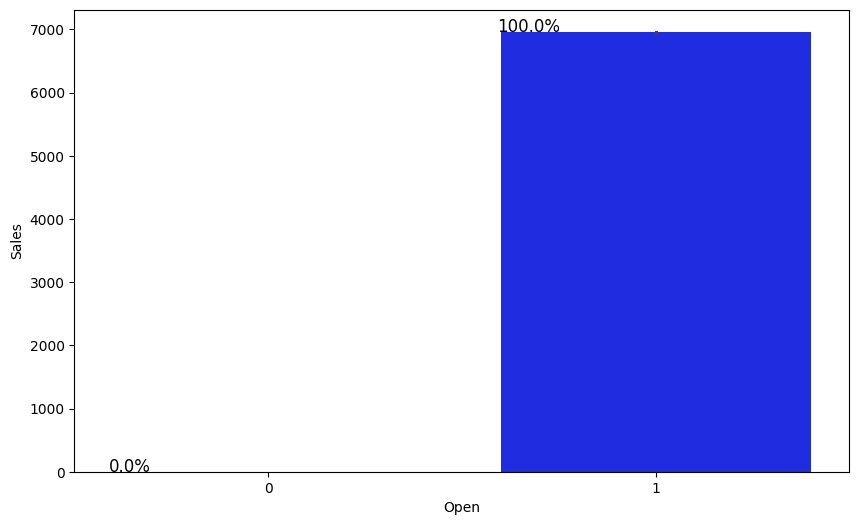

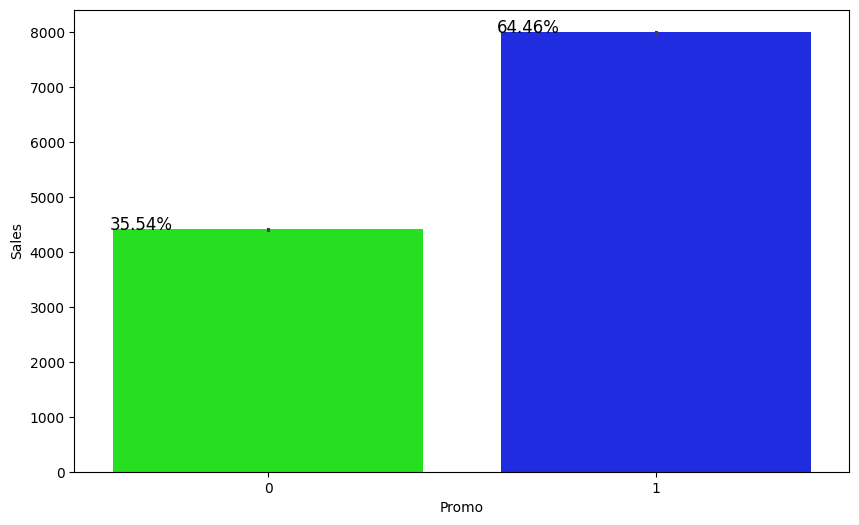

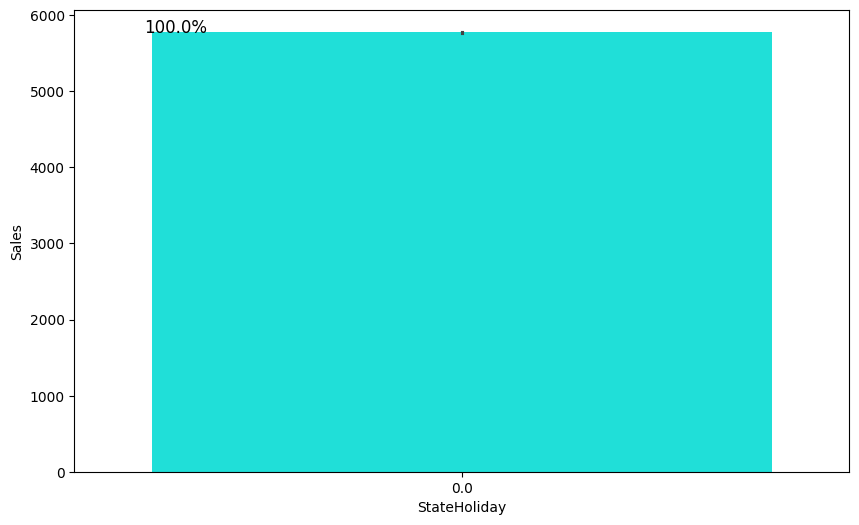

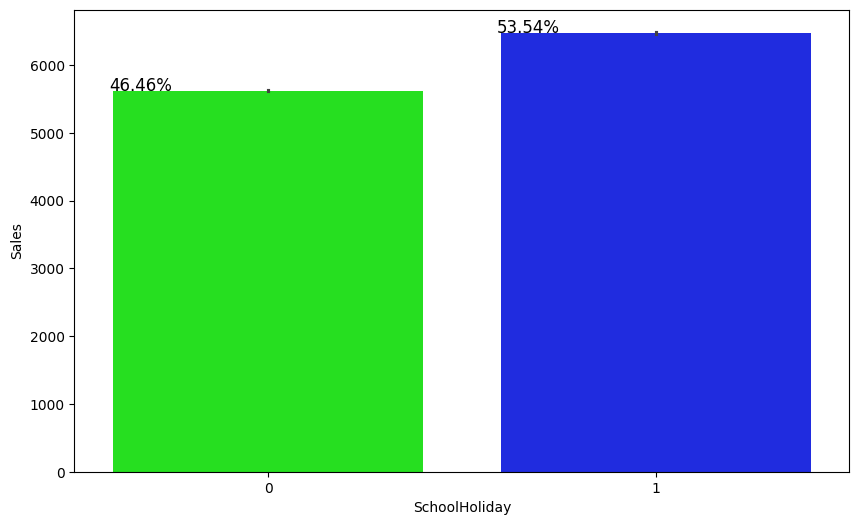

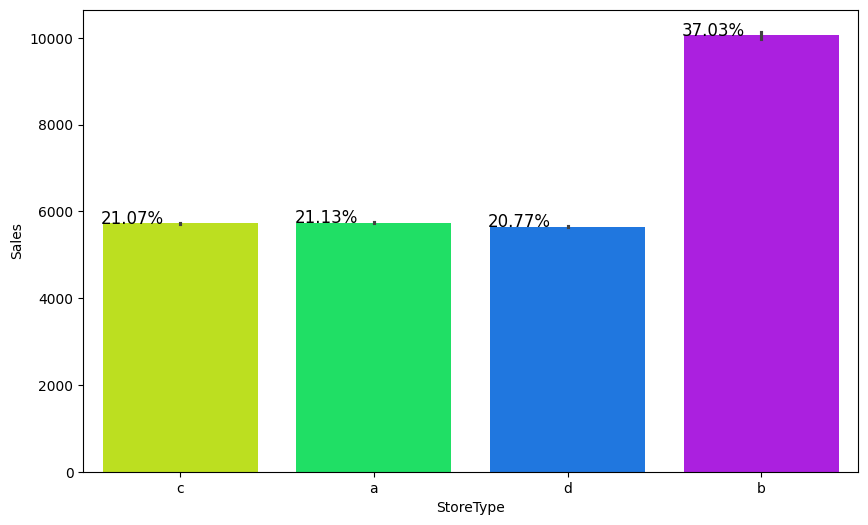

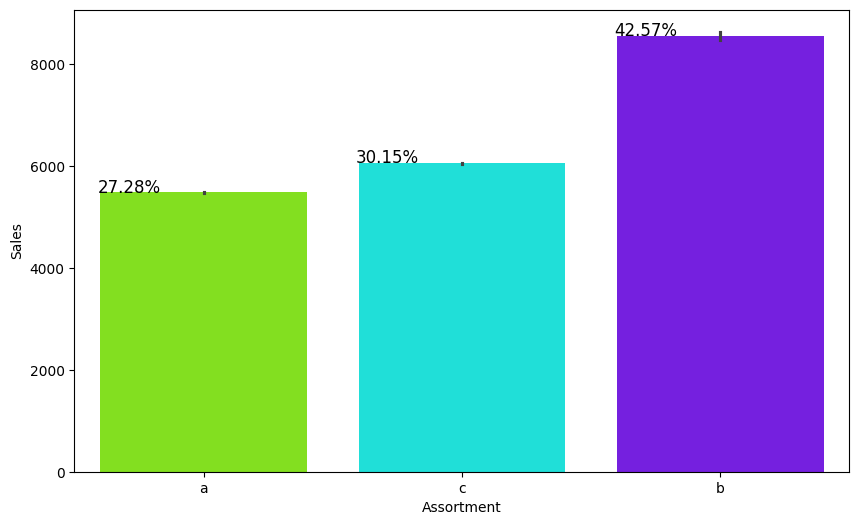

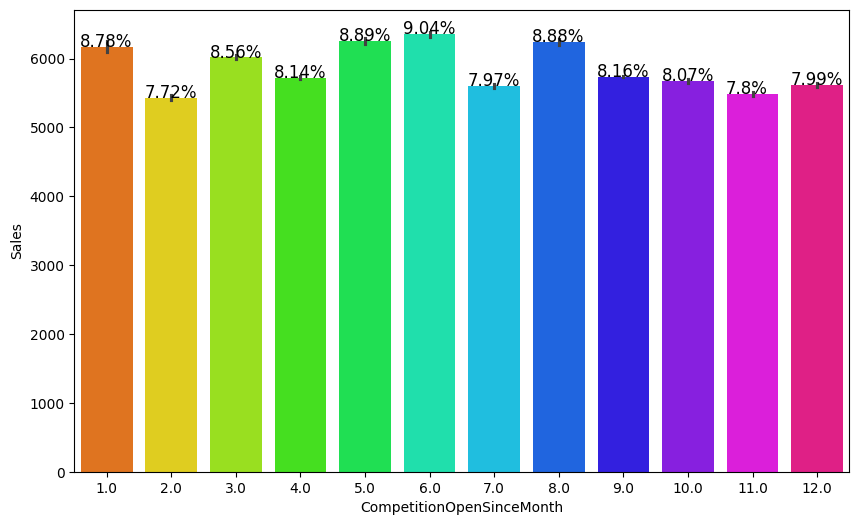

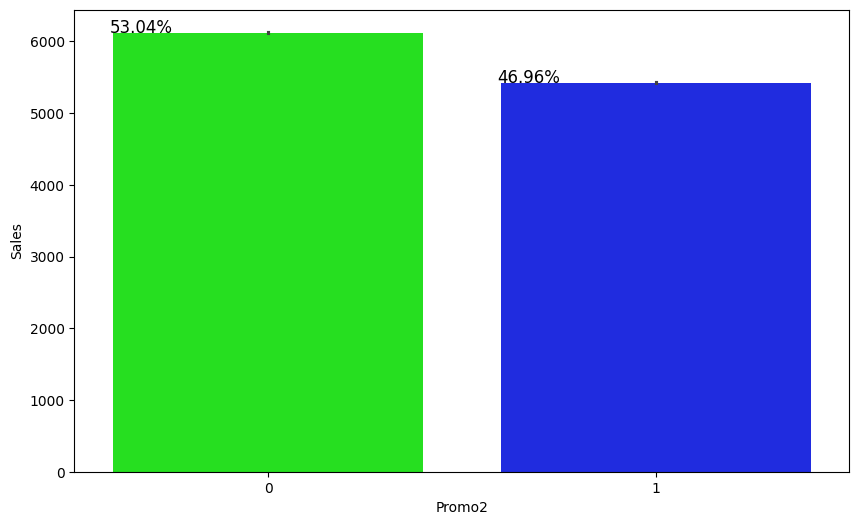

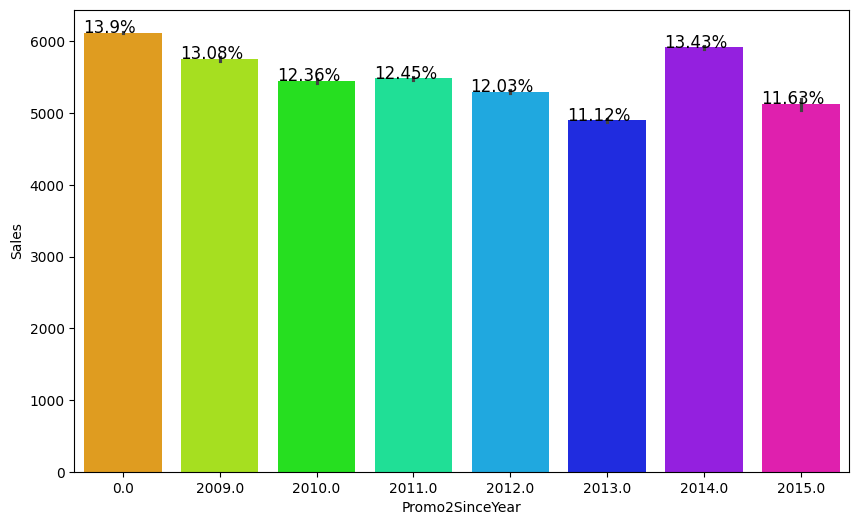

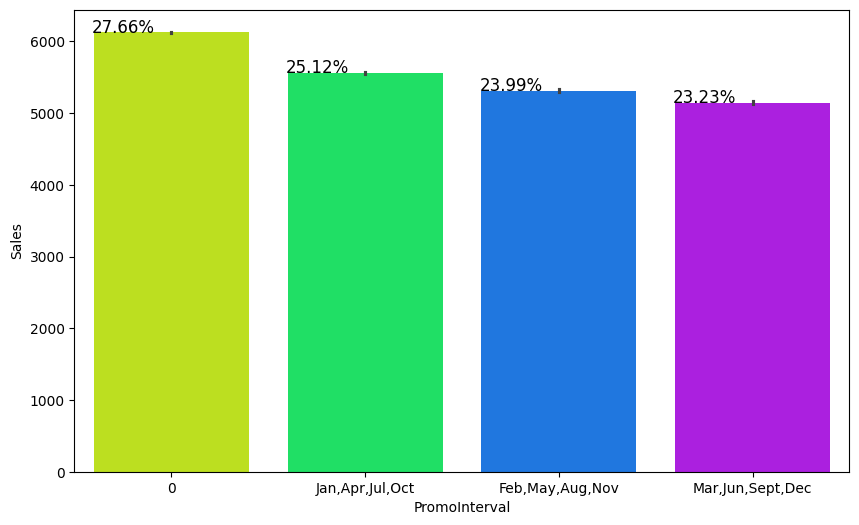

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the categorical variables
categorical_variables = ['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                         'CompetitionOpenSinceMonth', 'Promo2', 'Promo2SinceYear', 'PromoInterval']

# Set a color palette
palette = 'hsv'  # You can choose any palette you prefer

# Iterate over the categorical variables and plot each of them
for value in categorical_variables:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    ax = sns.barplot(x=value, y='Sales', data=df, palette=palette)  # Use specified palette
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())

    total = sum(totals)

    for i in ax.patches:
        ax.text(i.get_x() - .01, i.get_height() + .5,
                str(round((i.get_height() / total) * 100, 2)) + '%', fontsize=12)

    plt.show()


##### 1. Why did you pick the specific chart?

**1. Categorical Variables:**

 * The variables listed in categorical_variables are discrete in nature and represent different categories or factors that could potentially influence sales in Rossmann stores. These variables include factors like the day of the
 week, whether the store was open, whether a promotion was running, etc.

**2. Comparison Across Categories:**

* Bar plots are excellent for comparing the sales across different categories within each variable. Each bar represents a category, and the height of the bar corresponds to the average sales for that category. This allows for easy visual comparison of sales performance across different factors.

**3. Palette Choice:**

* A specific palette ('hsv') was chosen to provide multiple distinct colors for the bars. This enhances the visual appeal of the plots and helps differentiate between the bars corresponding to different categories within each variable.

**4. Percentage Labels:**

The code also includes percentage labels on each bar to show the contribution of each category to the total sales. This additional information aids in understanding the relative importance of each category in driving sales.

**5. Iterative Visualization:**

* By iterating over each categorical variable and plotting them individually, the code provides a comprehensive view of the relationship between each variable and sales. This approach allows for focused analysis of each factor's impact on sales.

**Overall, the choice of a bar plot in this context is well-suited for visually exploring how various categorical factors influence sales in Rossmann stores. It allows for clear comparisons and insights into the sales performance across different categories.**

##### 2. What is/are the insight(s) found from the chart?

*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from analyzing the relationship between categorical variables and sales in Rossmann stores can indeed help create a positive business impact. Here's how:

**Optimized Promotional Strategies:**

* Understanding that promotions lead to higher sales can help Rossmann optimize its promotional strategies. By allocating resources effectively to promote products during periods when sales are typically higher, Rossmann can increase revenue and profitability.

**Store Operation Management:**

* Insights about the impact of state holidays on sales can guide store operation management. Rossmann can adjust staffing levels and store opening hours accordingly to optimize resource utilization and minimize costs during low-sales periods.

**Product Assortment Planning:**

* Knowledge about the association between sales and store types, as well as assortment levels, can inform product assortment planning. Rossmann can prioritize stocking products that are popular among customers and align with the preferences of each store's target demographic, leading to increased customer satisfaction and sales.

**Strategic Decision Making:**

* Insights into factors such as the effectiveness of Promo2 and sales patterns on different days of the week can inform strategic decision-making. Rossmann can allocate resources strategically, focusing on initiatives that have the highest potential for driving sales and improving overall business performance.

**Competitive Advantage:**

* By leveraging these insights to optimize operations, promotions, and product offerings, Rossmann can gain a competitive advantage in the retail market. A data-driven approach to decision-making can help Rossmann stay ahead of competitors by continuously adapting to changing market dynamics and customer preferences.

**Overall, the insights gained from analyzing sales data can enable Rossmann to make informed decisions that enhance operational efficiency, increase sales, and ultimately drive positive business outcomes.**

<Axes: xlabel='Open', ylabel='Sales'>

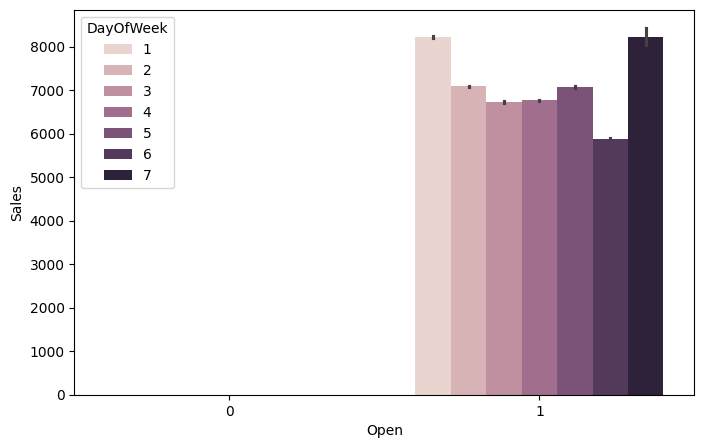

In [38]:
# open and storetype relationship
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

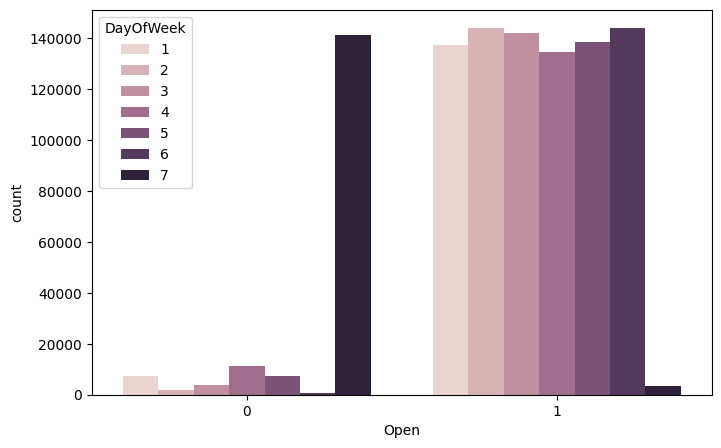

In [39]:
#Lets see open, how many shops are open on which days
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

####Observation:
This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

<Axes: xlabel='StoreType', ylabel='Sales'>

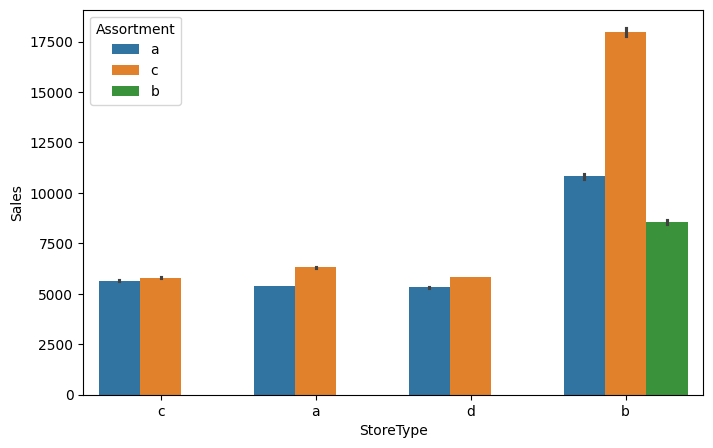

In [40]:
#Let's check the relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

####Observation:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [41]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


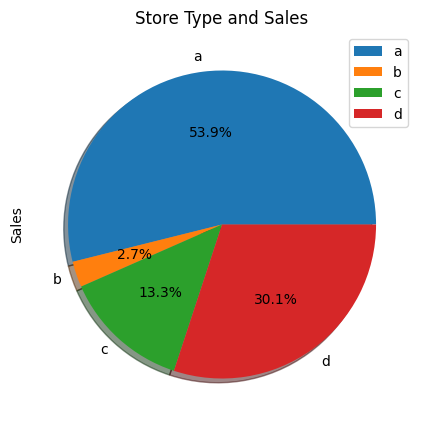

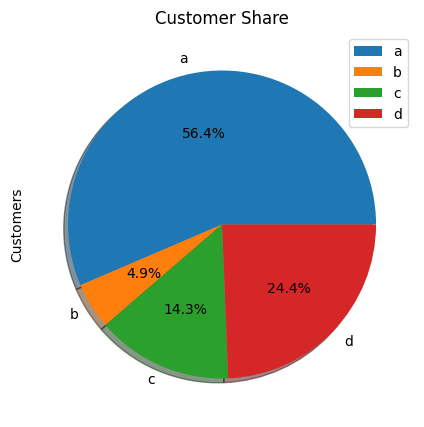

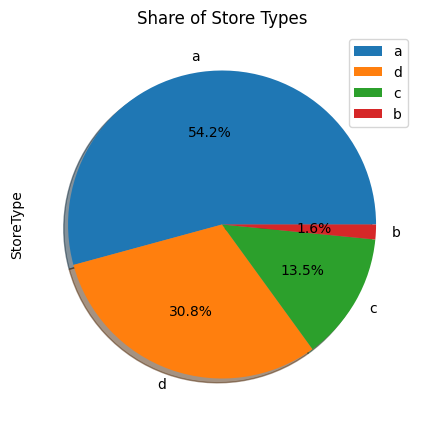

In [42]:
#let's explore store type a bit and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

####Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.



###Continuous Features:

####Sales with Time

In [43]:
years

array([2015, 2014, 2013])

In [44]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [45]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

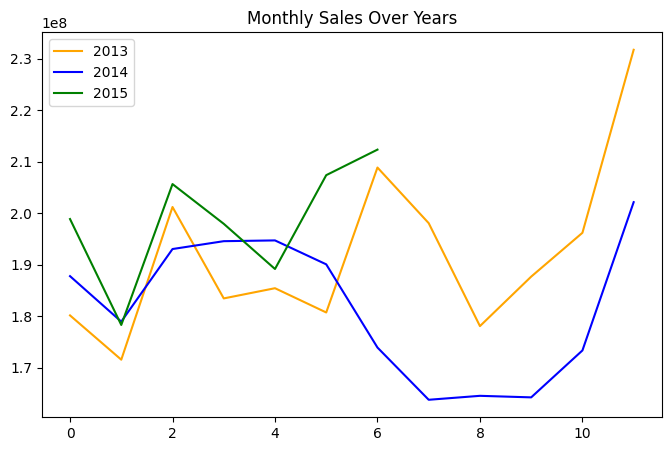

In [46]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

####Observation:
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<Axes: xlabel='Customers', ylabel='Sales'>

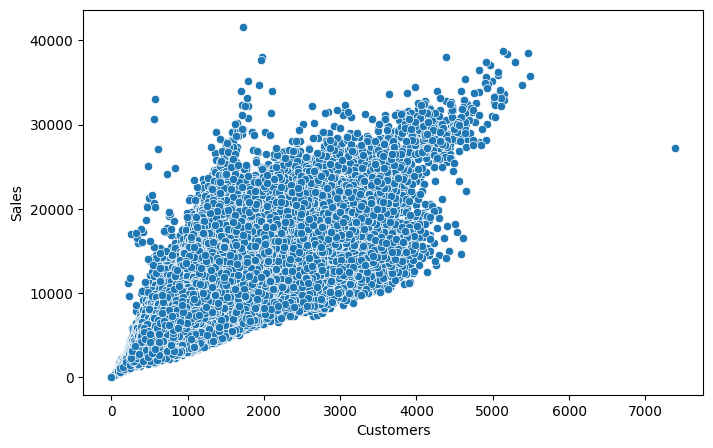

In [47]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

####Observation:
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

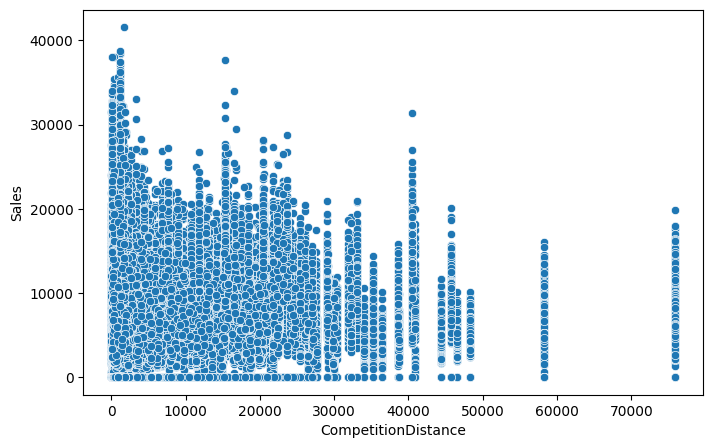

In [48]:
#scatterplot of Competition Distance and Sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

####Observation:
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

<Axes: ylabel='Density'>

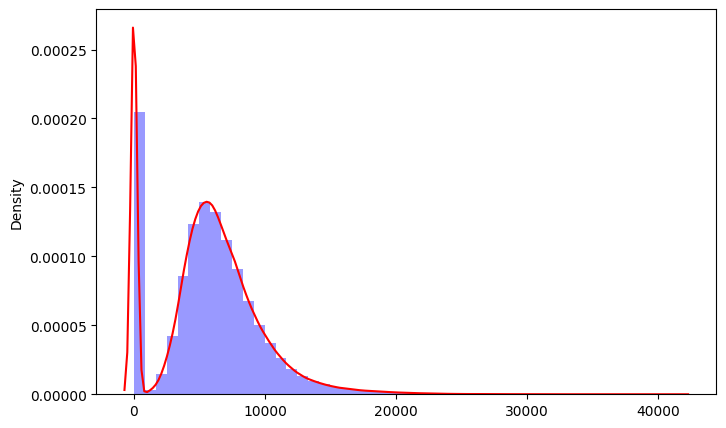

In [49]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df['Sales'], hist_kws={'color': 'blue'}, kde_kws={'color': 'red'})

####Observation:
The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

###Correlation Matrix
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

In [50]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

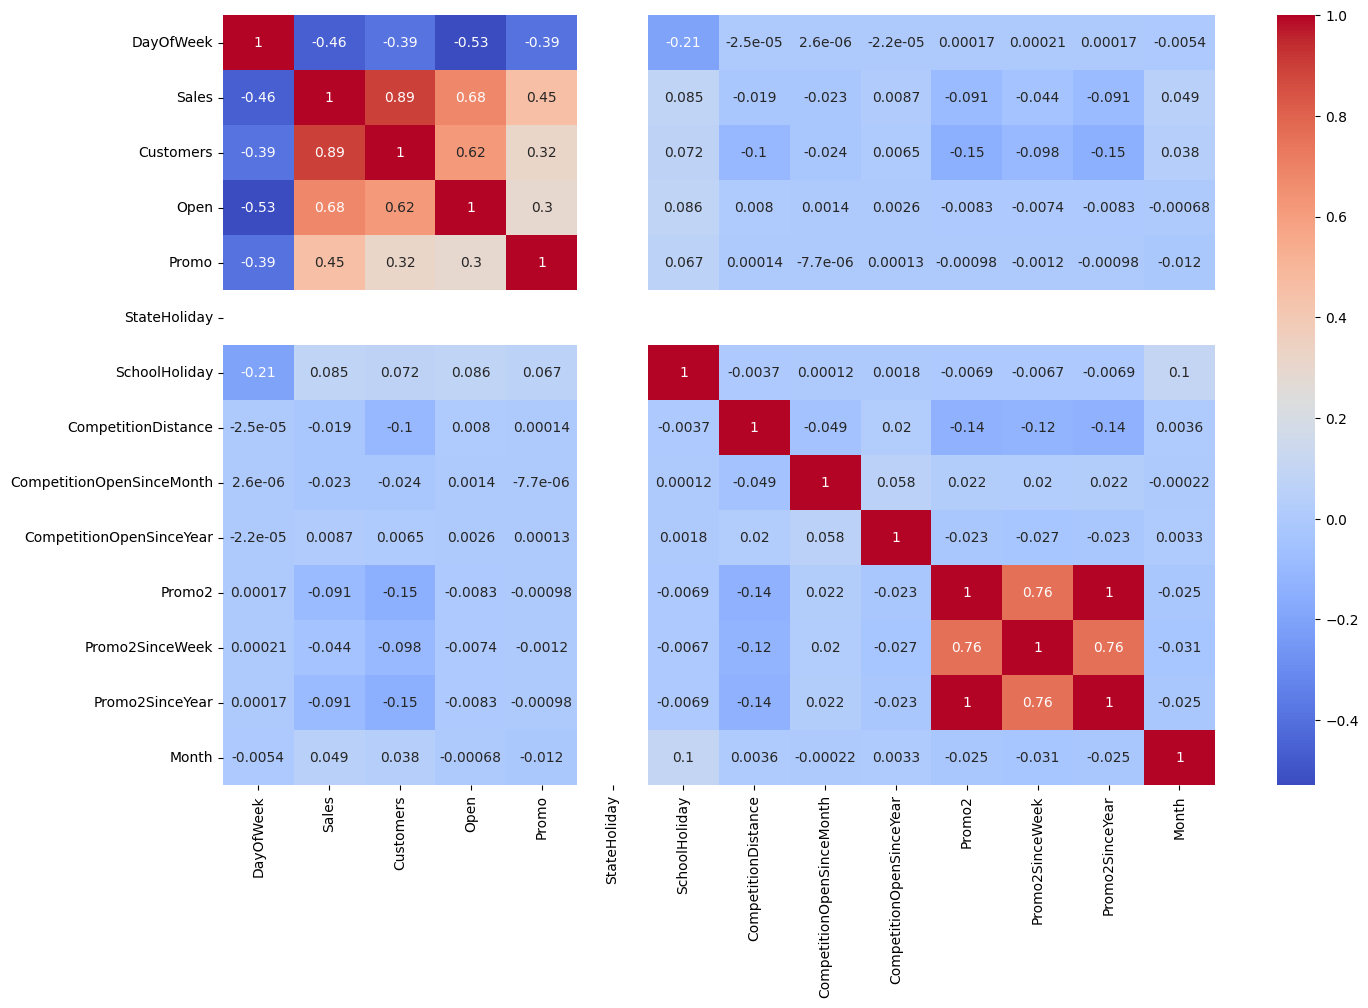

In [51]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

####Observation:
* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.


###EDA Conclusions and Hypotheses Validation:
* It makes sense that there is a positive association between sales and customers.

* From this, it can be inferred that Monday's sales were higher than Sunday's, which had the lowest weekly sales. This is likely due to the fact that stores are typically closed on Sundays. This supports the theory on this trait.

* It is evident that promotions have a favourable impact on sales and customers.

* It is evident that during state and school holidays, the majority of the stores stay closed.
It's crucial to remember, though, that more stores were open on school holidays than on state holidays, and as a result, sales were higher on school holidays.

* Store types 'b' and 'd' appear to have a lot more opportunities based on the statistics above, as they had higher sales per customer and a higher number of customers per store, respectively. Because store types A and C accounted for the bulk of the stores, they had the highest overall income figures despite having very identical "per customer and per store" sales figures. Store Type B, on the other hand, was extremely small in number, but even so, its average sales were higher than those of the others.

* It was previously noted that only store type B had all three types of assortment levels, while the other store types only had two. Because each B type store has a substantially higher revenue than the others, it appears that the products in those stores are distinct from those in the others.

* A comparison of the three years' sales shows that they rise towards the end of the year, suggesting that more people are shopping in advance of the holidays. There was Christmas seasonality at every store. This supports the earlier theory.
The second observation was a brief decline in sales in 2014, which was explained by the closure of some outlets for renovations.

* The majority of stores had higher sales than stores farther away and had competition distances between 0 and 10 km.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis (H0):** There is no significant difference in sales between stores open on Sundays and stores closed on Sundays.
* **Alternate Hypothesis (H1):** Stores open on Sundays have significantly higher sales compared to stores closed on Sundays.

#### 2. Perform an appropriate statistical test.

We can perform an independent samples t-test to compare the mean sales of stores open on Sundays versus stores closed on Sundays.

To perform an independent samples t-test to compare the mean sales of stores open on Sundays versus stores closed on Sundays, we need to follow these steps:

**Formulate Hypotheses:**

* **Null Hypothesis (H0):** There is no significant difference in sales between stores open on Sundays and stores closed on Sundays.

* Alternate Hypothesis (H1):** Stores open on Sundays have significantly higher sales compared to stores closed on Sundays.

**Select Significance Level:**

* We'll choose a significance level (alpha) of 0.05.

**Perform the T-test:**

* We'll use the scipy.stats.ttest_ind() function to perform the independent samples t-test.

**Interpret the Results:**

* If the p-value is less than alpha, we reject the null hypothesis, indicating a significant difference in sales. Otherwise, we fail to reject the null hypothesis.


In [52]:
from scipy.stats import ttest_ind

# Separate data for stores open and closed on Sundays
open_sundays_sales = df[df['DayOfWeek'] == 7]['Sales']
closed_sundays_sales = df[df['DayOfWeek'] != 7]['Sales']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(open_sundays_sales, closed_sundays_sales)

# Print results
print("Independent Samples T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in sales between stores open and closed on Sundays.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sales between stores open and closed on Sundays.")


Independent Samples T-Test Results:
T-statistic: -735.5019627448212
P-value: 0.0
Reject the null hypothesis. There is a significant difference in sales between stores open and closed on Sundays.


##### Which statistical test have you done to obtain P-Value?

We can perform an independent samples t-test to compare the mean sales of stores open on Sundays versus stores closed on Sundays.


##### Why did you choose the specific statistical test?

The specific statistical test chosen for comparing the mean sales of stores open on Sundays versus stores closed on Sundays is the independent samples t-test. Here's why this test was chosen:

1. **Independent Samples:** The samples (sales data) for stores open on Sundays and stores closed on Sundays are independent of each other. The sales of one store being open on Sunday does not affect the sales of another store being closed on Sunday.

2. **Two Groups:** There are two distinct groups being compared: stores open on Sundays and stores closed on Sundays.

3. **Continuous Outcome:** Sales data is continuous and numerical, making it suitable for the t-test.

4. **Normal Distribution Assumption:** The t-test assumes that the distributions of the sales data in the two groups are approximately normal. While this assumption may not be perfectly met, the t-test is robust to moderate violations of normality, especially with large sample sizes.

5. **Equal Variances Assumption:** The t-test assumes equal variances between the two groups. We can verify this assumption using Levene's test or by visually inspecting the data. If the assumption is violated, we can use Welch's t-test, which is a modification of the independent samples t-test that does not assume equal variances.

Given these considerations and assumptions, the independent samples t-test is an appropriate choice for comparing the mean sales of stores open on Sundays versus stores closed on Sundays in this scenario.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in sales between stores with and without promotions.

**Alternate Hypothesis (H1):** Stores with promotions have significantly higher sales compared to stores without promotions.

#### 2. Perform an appropriate statistical test.

We can perform an independent samples t-test to compare the mean sales of stores with promotions versus stores without promotions.

To perform an independent samples t-test to compare the mean sales of stores with promotions versus stores without promotions, we follow these steps:

1. **Formulate Hypotheses:**

* **Null Hypothesis (H0):** There is no significant difference in sales between stores with promotions and stores without promotions.

* **Alternate Hypothesis (H1):** Stores with promotions have significantly higher sales compared to stores without promotions.

2. **Select Significance Level:**

* We'll choose a significance level (alpha) of 0.05.

3. **Perform the T-test:**

* We'll use the scipy.stats.ttest_ind() function to perform the independent samples t-test.

4. **Interpret the Results:**

If the p-value is less than alpha, we reject the null hypothesis, indicating a significant difference in sales. Otherwise, we fail to reject the null hypothesis.

In [53]:
from scipy.stats import ttest_ind

# Separate data for stores with and without promotions
stores_with_promotions_sales = df[df['Promo'] == 1]['Sales']
stores_without_promotions_sales = df[df['Promo'] == 0]['Sales']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(stores_with_promotions_sales, stores_without_promotions_sales)

# Print results
print("Independent Samples T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in sales between stores with promotions and stores without promotions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in sales between stores with promotions and stores without promotions.")


Independent Samples T-Test Results:
T-statistic: 511.54718673163774
P-value: 0.0
Reject the null hypothesis. There is a significant difference in sales between stores with promotions and stores without promotions.


##### Which statistical test have you done to obtain P-Value?

We performed an independent samples t-test to compare the mean sales of stores with promotions versus stores without promotions.

##### Why did you choose the specific statistical test?

The specific statistical test chosen for comparing the mean sales of stores with promotions versus stores without promotions is the independent samples t-test. Here's why this test was chosen:

1. **Independent Samples:** The samples (sales data) for stores with promotions and stores without promotions are independent of each other. The sales of one store with promotions do not affect the sales of another store without promotions.

2. **Two Groups:** There are two distinct groups being compared: stores with promotions and stores without promotions.

3. **Continuous Outcome:** Sales data is continuous and numerical, making it suitable for the t-test.

4. **Normal Distribution Assumption:** The t-test assumes that the distributions of the sales data in the two groups are approximately normal. While this assumption may not be perfectly met, the t-test is robust to moderate violations of normality, especially with large sample sizes.

5. **Equal Variances Assumption:** The t-test assumes equal variances between the two groups. We can verify this assumption using Levene's test or by visually inspecting the data. If the assumption is violated, we can use Welch's t-test, which is a modification of the independent samples t-test that does not assume equal variances.

Given these considerations and assumptions, the independent samples t-test is an appropriate choice for comparing the mean sales of stores with promotions versus stores without promotions in this scenario.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** There is no significant difference in sales between different store types.

**Alternate Hypothesis (H1):** There is a significant difference in sales between different store types.

#### 2. Perform an appropriate statistical test.

We can perform a one-way analysis of variance (ANOVA) test to determine if there is a significant difference in mean sales across different store types.


To perform a one-way analysis of variance (ANOVA) test to determine if there is a significant difference in mean sales across different store types, we follow these steps:

1. **Formulate Hypotheses:**

* **Null Hypothesis (H0):** There is no significant difference in mean sales across different store types.

* **Alternate Hypothesis (H1):** There is a significant difference in mean sales across different store types.

2. **Select Significance Level:**

* We'll choose a significance level (alpha) of 0.05.

3. **Perform the ANOVA Test:**

* We'll use the scipy.stats.f_oneway() function to perform the ANOVA test.

4. **Interpret the Results:**

* If the p-value is less than alpha, we reject the null hypothesis, indicating a significant difference in mean sales across different store types. Otherwise, we fail to reject the null hypothesis.

In [54]:
from scipy.stats import f_oneway

# Separate sales data for different store types
store_type_sales = []
for store_type in df['StoreType'].unique():
    store_type_sales.append(df[df['StoreType'] == store_type]['Sales'])

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*store_type_sales)

# Print results
print("One-Way ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean sales across different store types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean sales across different store types.")


One-Way ANOVA Test Results:
F-statistic: 6817.19201183629
P-value: 0.0
Reject the null hypothesis. There is a significant difference in mean sales across different store types.


##### Which statistical test have you done to obtain P-Value?

We performed a one-way analysis of variance (ANOVA) test to determine if there is a significant difference in mean sales across different store types.

##### Why did you choose the specific statistical test?

The specific statistical test chosen for comparing the mean sales across different store types is the one-way analysis of variance (ANOVA) test. Here's why this test was chosen:

1. **Multiple Groups:** We have multiple groups (store types: A, B, C, D) being compared simultaneously.

2. **Continuous Outcome:** Sales data is continuous and numerical, making it suitable for ANOVA.

3. **Independence:** The sales data for each store type is assumed to be independent of the sales data for other store types.

4. **Normal Distribution Assumption:** ANOVA assumes that the residuals (deviations of individual data points from the group means) are normally distributed. While this assumption may not be perfectly met, ANOVA is robust to moderate violations of normality, especially with large sample sizes.

5. **Homogeneity of Variances:** ANOVA assumes that the variances of sales across different store types are approximately equal. We can verify this assumption using Levene's test or by visually inspecting the data.

Given these considerations and assumptions, the one-way ANOVA test is an appropriate choice for comparing the mean sales across different store types in this scenario. It allows us to determine if there is a significant difference in mean sales across the store types while accounting for the variability within each group and providing insights into which groups, if any, have significantly different means.

## ***6. Feature Engineering & Data Pre-processing***

In [55]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

######It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [56]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [57]:
# check
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0.0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


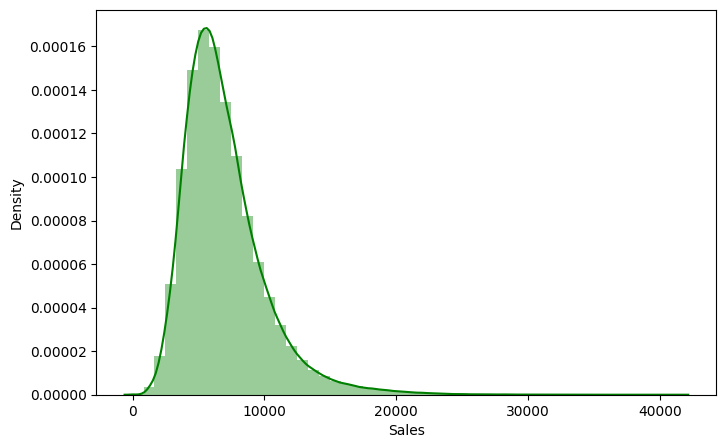

In [58]:
#distribution plot of Sales, as expected positively skewed
import seaborn as sns

sns.distplot(df1['Sales'], color='green')

# Display the plot
plt.show()


In [59]:
## transformation
df1['Sales'] = np.log(df1['Sales'])

In [60]:
df1.dropna(inplace=True)

In [61]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

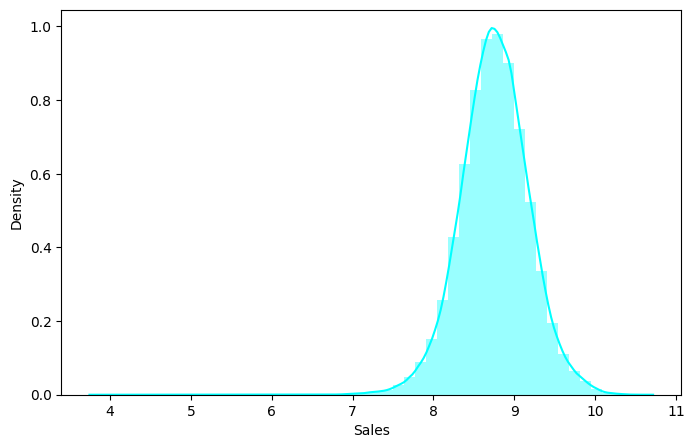

In [62]:
#distribution plot of Sales
sns.distplot(df1['Sales'], color='cyan')

# Display the plot
plt.show()

In [63]:
#changing into boolean
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [64]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [65]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [66]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [67]:
df1.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,0.0,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


###Outlier Detection

####Outliers and Z score:
In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 1559.


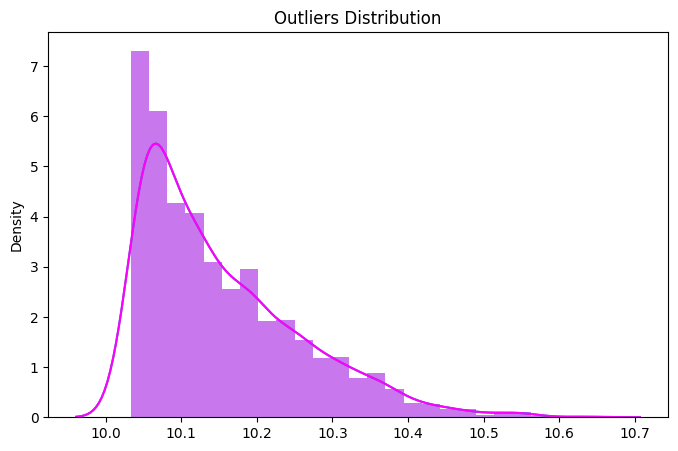

In [68]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

sns.distplot(outliers, color='magenta').set(title='Outliers Distribution')

# Display the plot
plt.show()

The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:

In [69]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [70]:
#exploring the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0.0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0.0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0.0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0.0,0,a,a,140.0,0,2013,1,4,22,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0.0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0.0,0,a,c,870.0,0,2015,7,29,194,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0.0,0,b,a,1180.0,0,2015,7,29,200,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0.0,0,b,a,1180.0,0,2015,7,30,207,26.0,0.0,0


####Observation:
Some interesting insights can be drawn from these outliers dataframe:
* First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
* All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
* It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.


In [71]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0.0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0.0,0,b,a,1180.0,0,2013,2,6,41,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0.0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0.0,0,b,a,1180.0,0,2013,3,10,69,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0.0,0,b,a,1180.0,0,2013,3,11,76,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0.0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0.0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0.0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

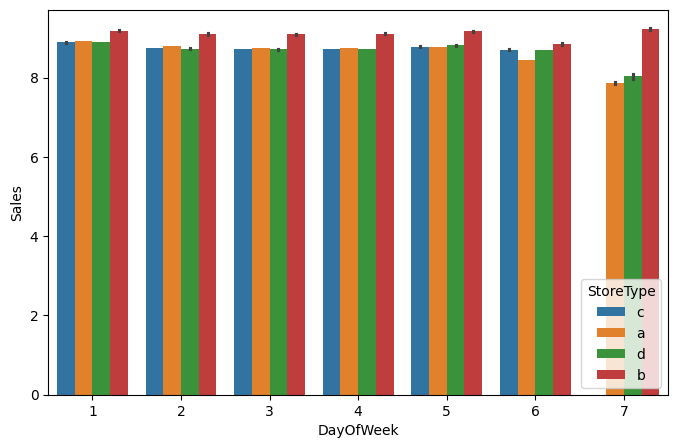

In [72]:
#let's explore store type and Day Of week
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [73]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0           0.0   
           259            7   8.977904       1686      0           0.0   
           262            7  10.053630       3479      0           0.0   
           274            7   8.243283        932      0           0.0   
           335            7   8.883640       1310      0           0.0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0           0.0   
           769            7   9.312446       2783      0           0.0   
           948            7   9.395990       2346      0           0.0   
           1081           7   8.659734        875      0           0.0   
           1097           7   9.496045       2710      0           0.0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6             15.0   
           259         0  2013      1           1          6              0.0   
           262         0  2013      1           1          6              0.0   
           274         1  2013      1           1          6              0.0   
           335         1  2013      1           1          6              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207            189.0   
           769         1  2015      7          30        207             22.0   
           948         0  2015      7          30        207             22.0   
           1081        0  2015      7          30        207            112.0   
           1097        0  2015      7          30        207            160.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-06 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-26 733      0.000000              0  
           769     31.857534              1  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

####Observation:
* This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
* Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.


In [74]:
#shape
df1.shape

(844338, 17)

**Outlier Treatment**

- It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
- The primary reasons for the behaviour are promotion and store type B.
- If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

In [75]:
#just in case something messes up
df2 = df1.copy()

In [76]:
df2.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,0.0,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


In [77]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [78]:
#check
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,619,0,0.0,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.34759


## ***7. ML Model Implementation***

##Modeling
**Factors affecting in choosing the model:**

Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:
- A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linear regression.
- Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data.

###Train-Test Split

In [79]:
#start date
df2.head(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,619,0,0.0,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.34759


In [80]:
#end date
df2.tail(1)

,,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
Date,Store,,,,,,,,,,,,,,,,,
2015-07-31,1115,5,538,1,0.0,1,d,c,5350.0,1,2015,7,31,212,22.0,38.071233,0,9.068777


In [81]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [82]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [83]:
#csv
df_train1 = df_train.to_csv("/content/drive/MyDrive/Rossman ML Training, Test dataset/df_train.csv")
df_test2 = df_test.to_csv("/content/drive/MyDrive/Rossman ML Training, Test dataset/df_test.csv")

In [84]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (798486, 15)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 15)
The shape of y_test is: (45852, 1)


In [85]:
#importing
from sklearn.preprocessing import OneHotEncoder

#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

#fit encoder
encoder = OneHotEncoder(sparse=False)

# train
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
encoded_features = [col + '_' + str(category) for col, categories in zip(categorical_cols, encoder.categories_) for category in categories]
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_features, index=X_train.index)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_train.drop(categorical_cols, axis=1, inplace=True)

# test
X_test_encoded = encoder.transform(X_test[categorical_cols])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_features, index=X_test.index)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)
X_test.drop(categorical_cols, axis=1, inplace=True)

In [86]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

###Baseline Model: Decision Tree
A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively.


In [87]:
#Importing libraries
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [88]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [89]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [90]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results
      and creates a dataframe that compares the various models.'''

  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [91]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

The Mean Absolute Error for the validation set is 0.350931
The Mean Squared Error for the validation set is 0.259277
The Root Mean Squared Error for the validation set is 0.509193
The R^2 for the validation set is 0.724751
The Adjusted R^2 for the validation set is 0.724594


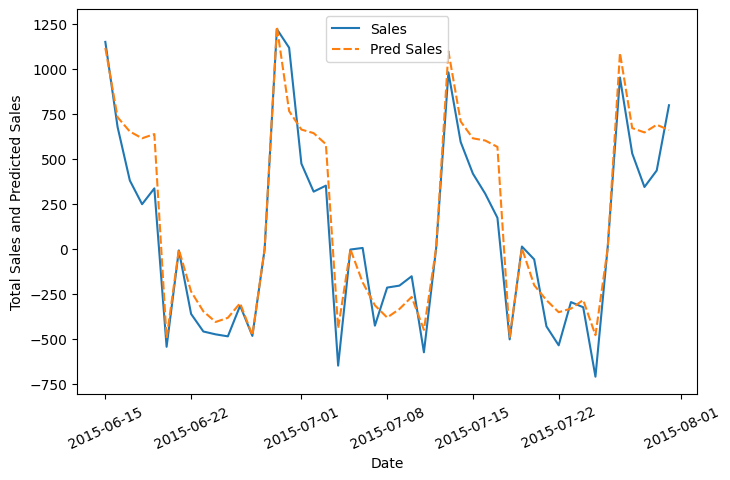

In [92]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [93]:
#add results to comparison df
add_list_to_final_df(decision_tree)

In [94]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003883,0.003313,0.057562,0.996687,0.996687,0.350931,0.259277,0.509193,0.724751,0.724594


####Observation:
- The decision tree was selected as the baseline model since the majority of our characteristics were categorical, with only a small number having continuous value. The findings above demonstrate that while a basic decision tree performs admirably on the validation set, it has overfitted the train set to an extreme. For upcoming data points, it is preferable to have a much more generalised model.

- Unlike scientific facilities where results are more important than interpretability, businesses prefer their models to be interpretable in order to recognise patterns and adjust their strategies.

- When the majority of the features are categorical, it is advantageous to continue with tree-based methods if interpretability is a priority. Tweaked hyperparameters can be used to expand the tree sufficiently deep without overfitting.

###Random Forest

In [95]:
# importing
from sklearn.ensemble import RandomForestRegressor

In [96]:
# fitting
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

The Mean Absolute Error for the validation set is 0.271429
The Mean Squared Error for the validation set is 0.143401
The Root Mean Squared Error for the validation set is 0.378683
The R^2 for the validation set is 0.847766
The Adjusted R^2 for the validation set is 0.847679


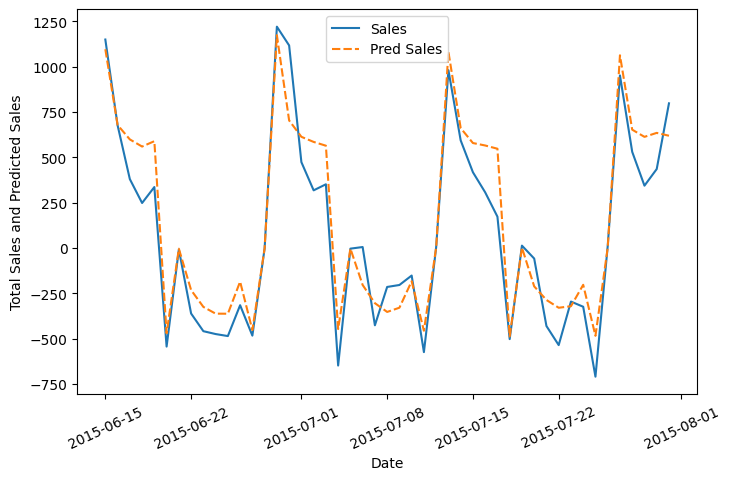

In [97]:
#model evaluation
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [98]:
# updating comparison df
add_list_to_final_df(random_f)

In [99]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.003883,0.003313,0.057562,0.996687,0.996687,0.350931,0.259277,0.509193,0.724751,0.724594
1,Random Forest Regressor,0.084388,0.016854,0.129824,0.983146,0.983145,0.271429,0.143401,0.378683,0.847766,0.847679


In [100]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [101]:
#creating a csv file for the cleaned dataset
# Rossmann sales prediction to be continued in the next notebook, due to lack of ram colab is crashing
#creating a csv file for the comparison dataframe
results = comparison_df.to_csv("/content/drive/MyDrive/Rossman ML Training, Test dataset/results.csv")

####Observation:
Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results in the Second Collab Notebook.